In [22]:
from qiskit import *
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize

In [256]:
def auto_circuit(inp):
    qc = QuantumCircuit(2)
    #RX and RY on the 0th qubits. This is hadamard equivalent for 1st qubit. 
    #The combination of RX and RY results in our desired bell state. This gives us the probablity of 50/50 for |01> and |10
    qc.ry(inp[0],0)
    qc.rx(inp[1],0)
    #RY whenever the qubit is 1 
    qc.rx(inp[2],1)
    #CNOT Gate after applying the hadamard equivalent 
    qc.cx(0, 1)
    return qc

In [257]:
#automating the simulation process for any circuit 
def sim_results(circuit, num_of_shots):
    #using the qasm noisy simulator for a variety of shots 
    simulator = Aer.get_backend('qasm_simulator')
    backend = Aer.get_backend('statevector_simulator')
    sim_result = execute(circuit, backend, shots=num_of_shots).result().get_counts()
    return sim_result

In [258]:
total_shots=[1,10,100,1000]

In [259]:
#Getting the probabilities of missing the shots
def miss_rate(sim_r,shots):
    missRate_01=sim_r.get('01',0)/shots
    missRate_10=sim_r.get('10',0)/shots
    sum_miss=(missRate_01-0.5)**2+(missRate_10-0.5)**2
    return sum_miss

In [224]:
#Optimizing to get maximum Hit rate 

In [260]:
def auto_miss_rate(cir_val, i):
    qc = auto_circuit(cir_val)
    probs = sim_results(qc, i)
    return get_miss_rate(probs, i)

In [290]:
opt = minimize(auto_miss_rate, np.random.rand(3)*np.pi, method='SLSQP', args=(total_shots[3],)) 
#We can find optimized values for each number in total_shots
#total_shots also represents our desired iterations. In our case, desired iterations are 1000

In [291]:
#Circuit that uses optimized values for RX and RY gates 
circuit=auto_circuit(opt.x)
circuit.draw()
#Optiimized values for RY and RX of qubit 0 should be between 0.5 to 1.5
#Optiomized value for RX of qubit 1 should be around 2.8 to 3.2

┌────────────┐┌─────────────┐     
q_0: ┤ RY(1.4852) ├┤ RX(0.15128) ├──■──
     ├────────────┤└─────────────┘┌─┴─┐
q_1: ┤ RX(2.9348) ├───────────────┤ X ├
     └────────────┘               └───┘

In [292]:
probs=sim_results(circuit,total_shots[3])

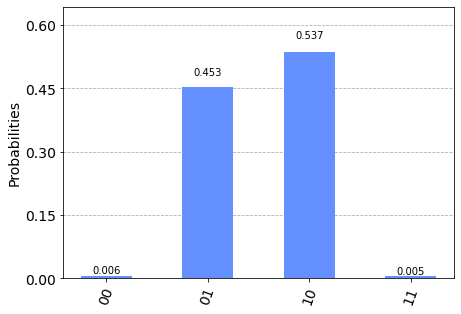

In [293]:
plot_histogram(probs)